# Readme

The MCPD claim that they allocate officers (and make traffic stops) based on accidents in each area. This file examines the veracity of that claim

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

In [2]:
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_columns', None)
import numpy as np
import itertools
# from tqdm import tqdm

In [3]:
df = pd.read_csv(r"C:\Users\mikha\Dropbox\mikhael_misc\Projects\Policing Thesis\Modified Dataset.csv")

In [4]:
#convert "Fatal" field to boolean

df['Fatal'] = df['Fatal']=='Yes'

In [25]:
race_set = {'ASIAN', 'BLACK', 'HISPANIC', 'NATIVE AMERICAN', 'OTHER', 'WHITE'}
race_set_w_total = {'ASIAN', 'BLACK', 'HISPANIC', 'NATIVE AMERICAN', 'OTHER', 'TOTAL', 'WHITE'}

# Cleaning Data

## Injuries without Accidents

Some observations have injuries but no accidents. I remove those

### First, confirm that they're randomly distributed

In [10]:
# gdf = gpd.GeoDataFrame(
#     df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

<AxesSubplot:>

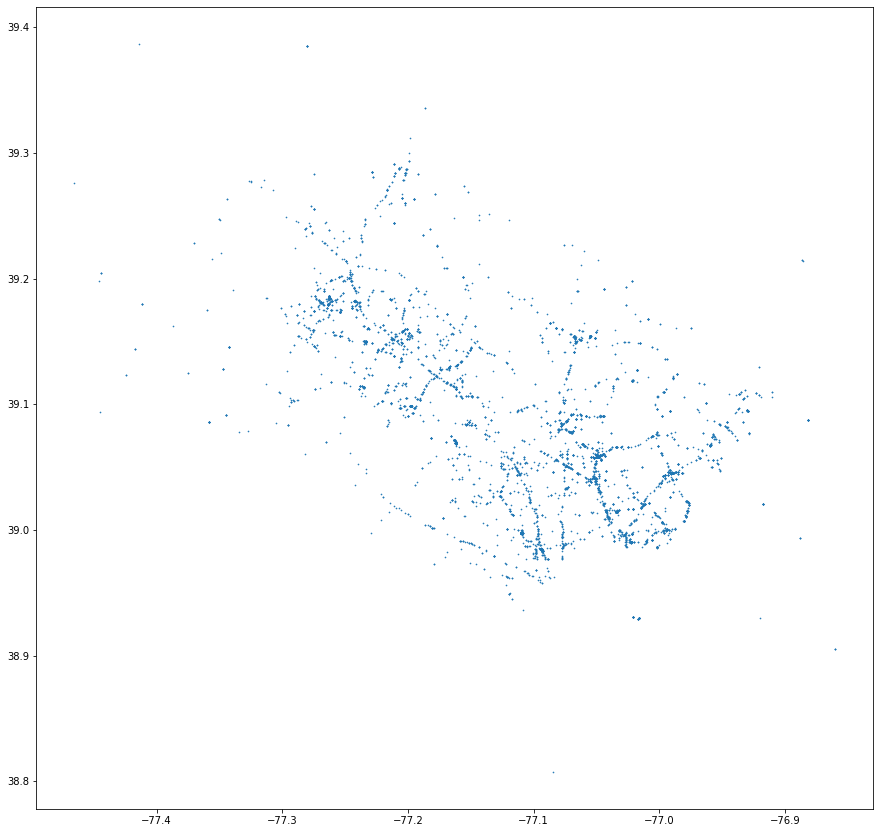

In [23]:
# gdf[(gdf['Accident']==0) & (gdf['Personal Injury']==1) & (gdf['Latitude']!=0) & (gdf['Longitude']<=-75)].plot(figsize=(15,15), markersize=.4)

### Now remove them

In [42]:
df = df[~((df['Accident']==0) & (df['Personal Injury']==1))]

# Data Wrangling

*coordinates_dict[ longitude_i ][ latitude_j ][ FIELD** ][ race ] = information for that area*

** "field" equals things like "Number of Charges @ 9 MPH", "Average Speed NOT in 9,14 MPH", etc

## Set up *coordinates_dict*

In [26]:
CELL_WIDTH = 0.005
DECIMAL_PLACES = 3

MIN_LONGITUDE = -77.6
MAX_LONGITUDE = -76.8

MIN_LATITUDE = 38.92
MAX_LATITUDE = 39.5

def rounder(x):#rounds to nearest CELL_WIDTH; X decimal places
    return np.around(CELL_WIDTH * round(x/CELL_WIDTH), DECIMAL_PLACES)

TOTAL_CELLS = round((((MIN_LONGITUDE-CELL_WIDTH)-(MAX_LONGITUDE+CELL_WIDTH))/CELL_WIDTH)*(((MIN_LATITUDE-CELL_WIDTH)-(MAX_LATITUDE+CELL_WIDTH))/CELL_WIDTH))
print('total # cells ~ ', TOTAL_CELLS)

coordinates_dict = {}
for x in np.arange(MIN_LONGITUDE-CELL_WIDTH, MAX_LONGITUDE+CELL_WIDTH, CELL_WIDTH):
    coordinates_dict[rounder(np.around(x,DECIMAL_PLACES))] = {}

for x in coordinates_dict:
    for y in np.arange(MIN_LATITUDE-CELL_WIDTH, MAX_LATITUDE+CELL_WIDTH, CELL_WIDTH):
        coordinates_dict[x][rounder(np.around(y,DECIMAL_PLACES))] = {
#                                                 "All Speeds Over Limit": {race: [] for race in race_set_w_total},
#                                                "Number of Speeding Charges":{race: 0 for race in race_set_w_total},
#                                                "Average Speed NOT in 9,14 MPH": {race: 0 for race in race_set_w_total},
                                               
#                                                  "Number of Charges @ 9 MPH": {race: 0 for race in race_set_w_total},
#                                                 "Number of Charges in 9,14 MPH": {race: 0 for race in race_set_w_total},
#                                                  "Number of Charges in 10,14 MPH": {race: 0 for race in race_set_w_total},
#                                                 "Number of Charges NOT in 9,14 MPH": {race: 0 for race in race_set_w_total}, 
                                                
#                                                  "Percent of Own Race's Charges @ 9 MPH": {race: 0 for race in race_set_w_total},
#                                                 "Percent of Own Race's Charges in 9,14 MPH": {race: 0 for race in race_set_w_total},
#                                                  "Percent of Own Race's Charges in 10,14 MPH": {race: 0 for race in race_set_w_total},
#                                                 "Percent of Own Race's Charges NOT in 9,14 MPH": {race: 0 for race in race_set_w_total}, 

#                                                 "Percent of Charges that were CHANGED": {race: 0 for race in race_set_w_total}, 
#                                                 "Percent of Charges that were NOT CHANGED": {race: 0 for race in race_set_w_total}, 
                                                                    
# #                                                  "As Percent of All Races' Charges @ 9 MPH" : {race: 0 for race in race_set_w_total},
# #                                                 "As Percent of All Races' in 9,14 MPH": {race: 0 for race in race_set_w_total},
# #                                                  "As Percent of All Races in 10,14 MPH": {race: 0 for race in race_set_w_total},
# #                                                 "As Percent of All Races in 9,14 MPH": {race: 0 for race in race_set_w_total},                                                                      
                                                
#                                                 "Number of Citations for Each Stop": {race: [] for race in race_set_w_total},
#                                                 "Racial Composition": {race: 0 for race in race_set_w_total},
                                                "Total Stops": 0,
                                                "Total Citations": 0,
                                                "Total Accidents": 0,
                                                "Total Injuries": 0,
                                                "Total Fatalities": 0,                                                                     
                                                                    }

        
        


total # cells ~  19116


### Def Rounding Function

In [27]:
def rounder(x):
    """
    Rounds to nearest CELL_WIDTH; decimal places
    """
    
    return np.around(CELL_WIDTH * round(x/CELL_WIDTH), DECIMAL_PLACES)

## Fill *coordinates_dict*

In [28]:
# zipped_vars=list(zip(df['Longitude'], df['Latitude'], df['Race'], df['Speed Over Posted Limit'], df['Number of Citations']))

for i,x in enumerate(list(zip(df['Longitude'], df['Latitude'], df['Race'], df['Speed Over Posted Limit'], df['Citation - (D_Search Outcome)'], df['Accident'], df['Personal Injury'], df['Fatal']))):
        if MIN_LONGITUDE <= x[0] <= MAX_LONGITUDE: #-77.6 <= x <= -76.8
            if MIN_LATITUDE <= x[1] <= MAX_LATITUDE:

#                 coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Racial Composition" ][ x[2] ] += 1
#                 coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Racial Composition" ][ 'TOTAL' ] += 1
                
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total Stops" ] += 1
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total Citations" ] += x[4]
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total Accidents" ] += x[5] # ==1 if accident
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total Injuries" ] += x[6]
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total Fatalities" ] += x[7]
                

                
#                 if not np.isnan(x[3]): # if df["Speed Over Posted Limit"].iloc[i] != np.nan
                    
#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Speeding Charges" ][ x[2] ] += 1
#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Speeding Charges" ][ 'TOTAL' ] += 1

#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "All Speeds Over Limit" ][ x[2] ].append(x[3])
#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "All Speeds Over Limit" ]['TOTAL'].append(x[3])

#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Speeding Charges" ][ x[2] ] += 1
#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Speeding Charges" ][ 'TOTAL' ] +=1

#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Citations for Each Stop" ][ x[2] ].append(x[4])
#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Citations for Each Stop" ][ 'TOTAL' ].append(x[4])


#                     if x[3] == 9:
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges @ 9 MPH" ][ x[2] ] += 1
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges @ 9 MPH" ][ 'TOTAL' ] += 1

#                     if 9 <= x[3] <= 14:
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges in 9,14 MPH" ][ x[2] ] += 1
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges in 9,14 MPH" ][ 'TOTAL' ] += 1

#                     if 10 <= x[3] <= 14:
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges in 10,14 MPH" ][ x[2] ] += 1
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges in 10,14 MPH" ][ 'TOTAL' ] += 1
                        
#                     if 9 > x[3] or x[3] > 14:
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges NOT in 9,14 MPH" ][ x[2] ] += 1
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges NOT in 9,14 MPH" ][ 'TOTAL' ] += 1

## Create pd dataframe from coordinates_dict

In [47]:
#convert dict to pd df
allocation_balance_df = pd.DataFrame.from_dict({(i,j): coordinates_dict[i][j] 
                           for i in coordinates_dict.keys() 
                           for j in coordinates_dict[i].keys()},
                       orient='index')

#give names to multi-index
allocation_balance_df.index.names = ['long', 'lat']

#convert indices to cols
allocation_balance_df.reset_index(level=allocation_balance_df.index.names, inplace=True)

In [48]:
#convert to geopandas dataframe
gdf = gpd.GeoDataFrame(
    allocation_balance_df, geometry=gpd.points_from_xy(allocation_balance_df['long'], allocation_balance_df['lat']))

In [49]:
# create fields
gdf['Stops per Accident'] = gdf['Total Stops'] / gdf['Total Accidents']
gdf['Accidents per Stop'] = gdf['Total Accidents'] / gdf['Total Stops']

gdf['Stops per Injury'] = gdf['Total Stops'] / gdf['Total Injuries']
gdf['Injuries per Stop'] = gdf['Total Injuries'] / gdf['Total Stops']

gdf['Stops per Fatality'] = gdf['Total Stops'] / gdf['Total Fatalities']
gdf['Fatalities per Stop'] = gdf['Total Fatalities'] / gdf['Total Stops']

#replace inf with 0
gdf.replace(np.inf, 0, inplace=True)

#drop cells with less than 30 stops
gdf = gdf[gdf['Total Stops']>=30]

# replace nan with zero
gdf.fillna(0, inplace=True)

# normalize fields
for field in list(set(gdf.columns) - set(['long', 'lat', 'geometry'])): #all cols excep long, lat, geometry
    gdf['Normalized ' + field] = (gdf[field]-gdf[field].mean())/gdf[field].std()
    
# replace nan with zero again after normalizing
gdf.fillna(0, inplace=True)

## Export to CSV

In [43]:
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

'2021-03-17'

In [39]:
gdf.to_csv(f"Police Stops vs Accidents - width={str(CELL_WIDTH)} - {today}.csv", index=False)